In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import neighbors





borders = pd.read_csv('GEODATASOURCE-COUNTRY-BORDERS.csv')
data15 = pd.read_csv('2015.csv')
data16 = pd.read_csv('2016.csv')
data17 = pd.read_csv('2017.csv')
three_data_year = pd.read_csv('Three-Year-Data.csv')

In [12]:
# three_data_year.groupBy('Country')

In [13]:
three_year_data = pd.read_csv('Three-Year-Data.csv')
data15_region_subset = data15.loc[:,['Region','Country']]

In [14]:
three_data_year = three_data_year.merge(data15_region_subset, how='inner',left_on='Country Name',right_on='Country')
three_data_year = three_data_year.drop(['Country'], axis=1)
# three_data_year = three_data_year[three_data_year['Country Name'],three_data_year[]]
three_data_year_2015 = three_data_year.loc[:,['Country Name','Region','Country Border Name','Happiness Score 2015']]

In [15]:
three_data_year_2015

,Country Name,Region,Country Border Name,Happiness Score 2015
0,United Arab Emirates,Middle East and Northern Africa,Oman,6.853
1,United Arab Emirates,Middle East and Northern Africa,Saudi Arabia,6.411
2,Afghanistan,Southern Asia,China,5.140
3,Afghanistan,Southern Asia,Iran,4.686
4,Afghanistan,Southern Asia,Pakistan,5.194
5,Afghanistan,Southern Asia,Tajikistan,4.786
6,Afghanistan,Southern Asia,Turkmenistan,5.548
7,Afghanistan,Southern Asia,Uzbekistan,6.003
8,Albania,Central and Eastern Europe,Greece,4.857
9,Albania,Central and Eastern Europe,Montenegro,5.192


In [16]:
groupby_region = three_data_year_2015.groupby('Country Name')['Region'].count().reset_index()

In [17]:
groupby_region = groupby_region[groupby_region['Region'] >= 3] 

In [18]:
groupby_region

,Country Name,Region
0,Afghanistan,6
1,Albania,4
2,Algeria,6
3,Angola,4
4,Argentina,4
5,Armenia,4
6,Austria,7
7,Azerbaijan,4
9,Belarus,4
10,Belgium,4


In [155]:
group_region = three_data_year_2015.groupby(['Region','Country Name']).count().reset_index()
group_region_number3 = group_region[group_region['Country Border Name'] >= 3]
print(group_region_number3)
group_region_number3.drop('Happiness Score 2015',axis=1)
doto = three_data_year_2015.merge(group_region_number3,how = 'inner',left_on = 'Country Name',right_on = 'Country Name').drop(['Country Border Name_y'],axis=1)
doto = doto.rename(columns={'Happiness Score 2015_y':'NoOfNeighbours'})

                          Region              Country Name  \
0     Central and Eastern Europe                   Albania   
1     Central and Eastern Europe                   Armenia   
2     Central and Eastern Europe                Azerbaijan   
3     Central and Eastern Europe                   Belarus   
4     Central and Eastern Europe    Bosnia and Herzegovina   
5     Central and Eastern Europe                  Bulgaria   
6     Central and Eastern Europe                   Croatia   
7     Central and Eastern Europe            Czech Republic   
9     Central and Eastern Europe                   Georgia   
10    Central and Eastern Europe                   Hungary   
11    Central and Eastern Europe                Kazakhstan   
12    Central and Eastern Europe                Kyrgyzstan   
13    Central and Eastern Europe                    Latvia   
14    Central and Eastern Europe                 Lithuania   
15    Central and Eastern Europe                 Macedonia   
17    Ce

In [163]:



data = doto 
arr = pd.DataFrame()
a = list(data.groupby('Country Name')['Happiness Score 2015_x'])
for i in range(len(a)):
    val = a[i][1].tolist()
    arr.loc[i,0] = a[i][0]
    arr.loc[i,1] = val[0]
    arr.loc[i,2] = val[1]
    arr.loc[i,3] = val[2]


arr.rename(columns = {0:'name',1:'a',2:'b',3:'c'},inplace = True)    
arr2 = arr.merge(data15[['Country','Happiness Score']],how = 'inner',left_on = 'name',right_on = 'Country').drop(['name'],axis=1)
arr2
X = arr2[['a','b','c']]
y = arr2[['Happiness Score']]
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
model = make_pipeline(
    SimpleImputer(strategy='mean'), # impute missing values
    MinMaxScaler(),                 # scale each feature to 0-1
    LinearRegression(fit_intercept=True)
)
model.fit(X_train, y_train)
result = (model.predict(X))
arr2['predicted'] = result
print('Predicting happiness scores by having two of the neighbours')
print('Training score :',model.score(X_train, y_train))
print('Testing score :',model.score(X_valid, y_valid))

Predicting happiness scores by having two of the neighbours
Training score : 0.5335463118547311
Testing score : 0.5801400500772979


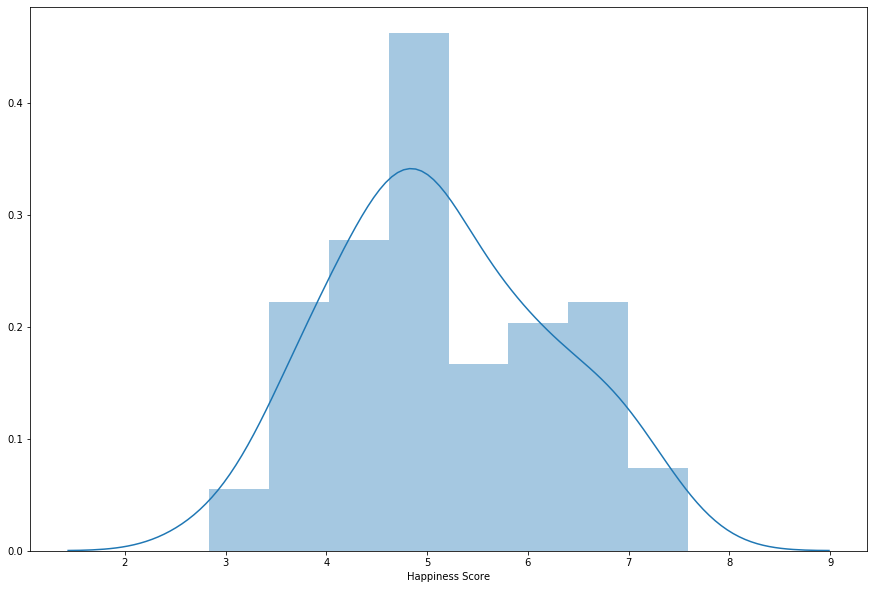

In [164]:
arr2
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(arr2['Happiness Score'])

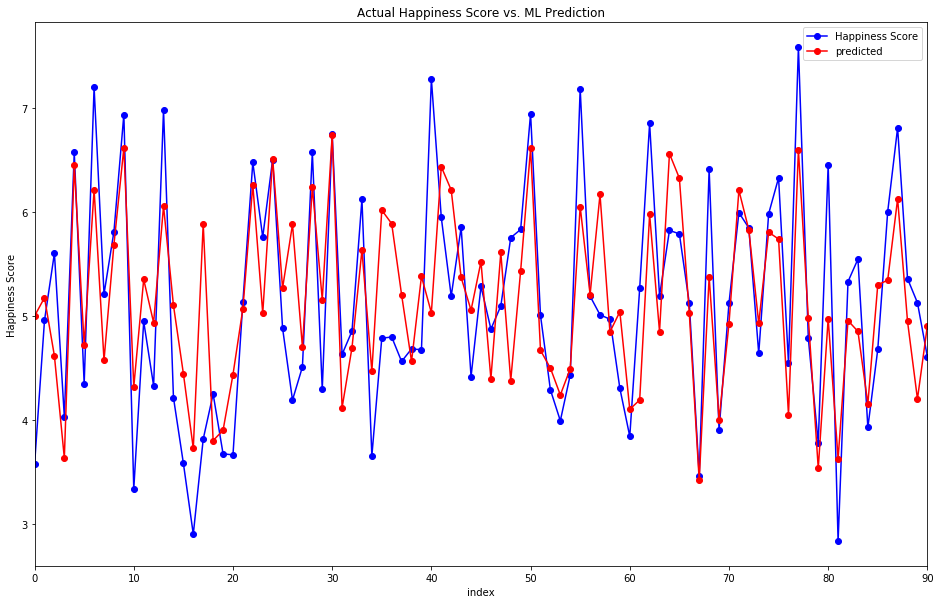

In [165]:
arr3 = arr2[['Happiness Score','predicted']]
arr3['Happiness Score'].plot(figsize=(16,10),style = 'bo-')
arr3['predicted'].plot(figsize=(16,10),style = 'ro-')
plt.title('Actual Happiness Score vs. ML Prediction')
plt.xlabel('index')
plt.ylabel('Happiness Score')
plt.legend(['Happiness Score','predicted'])

Text(0.5, 1.0, 'Difference Between Predicted and Actual Happiness Score')

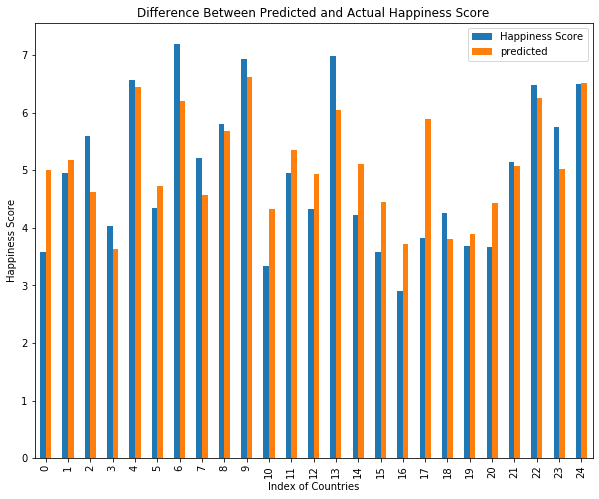

In [168]:
arr3 = arr3[:25]
arr3.plot(kind='bar',figsize=(10,8))
plt.xlabel('Index of Countries')
plt.ylabel('Happiness Score')
plt.title('Difference Between Predicted and Actual Happiness Score')

In [301]:
X = arr2[['a','b','c']]
y = arr2[['Happiness Score']]
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.3)

model = make_pipeline(
    SimpleImputer(strategy='mean'), # impute missing values
    MinMaxScaler(),                 # scale each feature to 0-1
    neighbors.KNeighborsRegressor(n_neighbors = 3)
)
model.fit(X_train, y_train)
result = (model.predict(X))
arr2['predicted'] = result
print('Predicting happiness scores by having three neighbour countries and using KNN')
print('Training score :',model.score(X_train, y_train))
print('Testing score :',model.score(X_valid, y_valid))

Predicting happiness scores by having two of the neighbours
Training score : 0.6679475701478768
Testing score : 0.5753797237770579
